## 209 - Outbreak Instability with the Showalter Index

[Youtube](https://www.youtube.com/watch?v=QZEUuuEAP-8&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=202)

In [1]:
from siphon.simplewebservice.iastate import IAStateUpperAir
from datetime import datetime
import pandas as pd

In [2]:
data = IAStateUpperAir.request_all_data(datetime(2021, 3, 17, 12))

In [3]:
data

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind
0,967.0,386.0,0.2,-4.3,270.0,7.0,CWPL,2021-03-17 12:00:00,7.000000,1.285879e-15
1,952.0,511.0,0.2,-4.6,NaN,NaN,CWPL,2021-03-17 12:00:00,NaN,NaN
2,940.6,609.0,NaN,NaN,280.0,17.0,CWPL,2021-03-17 12:00:00,16.741732,-2.952019e+00
3,925.0,746.0,0.4,-2.6,285.0,23.0,CWPL,2021-03-17 12:00:00,22.216294,-5.952838e+00
4,905.5,914.0,NaN,NaN,275.0,22.0,CWPL,2021-03-17 12:00:00,21.916283,-1.917426e+00
...,...,...,...,...,...,...,...,...,...,...
14833,7.6,32308.0,NaN,NaN,260.0,37.0,KYMW,2021-03-17 12:00:00,36.437887,6.424983e+00
14834,7.3,32613.0,NaN,NaN,255.0,24.0,KYMW,2021-03-17 12:00:00,23.182220,6.211657e+00
14835,7.0,32880.0,-42.5,-72.5,270.0,47.0,KYMW,2021-03-17 12:00:00,47.000000,8.633760e-15
14836,6.4,33528.0,NaN,NaN,265.0,59.0,KYMW,2021-03-17 12:00:00,58.775487,5.142189e+00


In [4]:
len(data['station'].unique())

121

In [5]:
df_locations = pd.read_csv('https://ruc.noaa.gov/raobs/stat2000.txt', 
                           delim_whitespace = True, skiprows = 1, usecols = [0, 3, 4], 
                           names = ['station', 'lat', 'lon'])
df_locations['lon']*= -1

In [6]:
df_locations.head()

,station,lat,lon
0,NPC,14.05,-83.57
1,EPZ,31.90,-106.70
2,DRA,36.93,-116.07
3,DRA,36.60,-115.97
4,DRA,36.95,-116.05


In [7]:
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np

In [8]:
index = {}
for stn in data['station'].unique():
    sounding = data[data['station'] == stn]
    sounding.dropna(subset = ['temperature', 'pressure', 'dewpoint'], inplace = True)
    
    try:
        sho = mpcalc.showalter_index(sounding['pressure'].values * units.hPa,
                                    sounding['temperature'].values * units.degC,
                                    sounding['dewpoint'].values * units.degC)[0].m
        
    except Exception as e:
        sho = np.nan
        print(f'Error for station {stn} - {e}')
    
    index[stn] = sho

/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset = ['temperature', 'pressure', 'dewpoint'], inplace = True)
/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset = ['temperature', 'pressure', 'dewpoint'], inplace = True)
/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset 

Error for station KABQ - all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Error for station KDNR - all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset = ['temperature', 'pressure', 'dewpoint'], inplace = True)
/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset = ['temperature', 'pressure', 'dewpoint'], inplace = True)
/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset 

Error for station KFGZ - all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Error for station KLKN - all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Error for station KMEX - all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset = ['temperature', 'pressure', 'dewpoint'], inplace = True)
/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset = ['temperature', 'pressure', 'dewpoint'], inplace = True)
/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset 

Error for station KREV - all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Error for station KRIW - all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset = ['temperature', 'pressure', 'dewpoint'], inplace = True)
/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset = ['temperature', 'pressure', 'dewpoint'], inplace = True)
/tmp/ipykernel_136510/314748720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sounding.dropna(subset 

In [9]:
index

{'CWPL': 10.377497483126852,
 'CWQI': 17.892927905560953,
 'CWSE': 8.496490053450582,
 'CYAH': 18.48837839858523,
 'CYBK': 16.59951478099036,
 'CYCB': 14.969704254176584,
 'CYEU': 19.410381250026674,
 'CYEV': 15.999692157215826,
 'CYJT': 18.486553990197066,
 'CYLT': 16.602019613610807,
 'CYMO': 15.304876456322841,
 'CYPH': 18.578897222241878,
 'CYQD': 10.742280768560107,
 'CYRB': 20.162821580940204,
 'CYSM': 7.483369075245918,
 'CYUX': 16.402348978597658,
 'CYVP': 19.412388293966444,
 'CYVQ': 10.73682502460072,
 'CYYE': 4.741740650777409,
 'CYYQ': 20.74604955052107,
 'CYYR': 23.199699474095638,
 'CYZT': 11.898830706887587,
 'CYZV': 14.631868701117178,
 'CZXS': 7.287364262895075,
 'KABQ': nan,
 'KABR': 16.726177187725387,
 'KADQ': 9.150201286889754,
 'KAKN': 16.816921912646933,
 'KALY': 9.620171289755984,
 'KAMA': 6.998659324205104,
 'KANC': 12.179270324195684,
 'KANN': 4.843738163110498,
 'KAPX': 10.65174533594049,
 'KBET': 15.941816676314453,
 'KBIS': 15.16949606536462,
 'KBMX': -0.56

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
crs = ccrs.LambertConformal(central_longitude = -100, central_latitude = 45)
bounds = [(-122, -75, 25, 50)]

In [12]:
def get_color(showalter_index):
    """
    Assign a color to Showalter Index based on value.
    """
    if showalter_index > 2:
        return 'tab:green'
    if showalter_index > 0:
        return 'tab:olive'
    if showalter_index > -3:
        return 'tab:orange'
    if showalter_index > -6:
        return 'tab:red'
    if showalter_index <= 6:
        return 'tab:purple'
    return 'black'

In [13]:
def inbounds(lat, lon, minlon, maxlon, minlat, maxlat):
    """
    Determine if a lat / lon pair falls mathematically within the given bounds.
    """
    if (lon >= minlon) & (lon <= maxlon) & (lat <= maxlat) & (lat >= minlat):
        return True
    return False

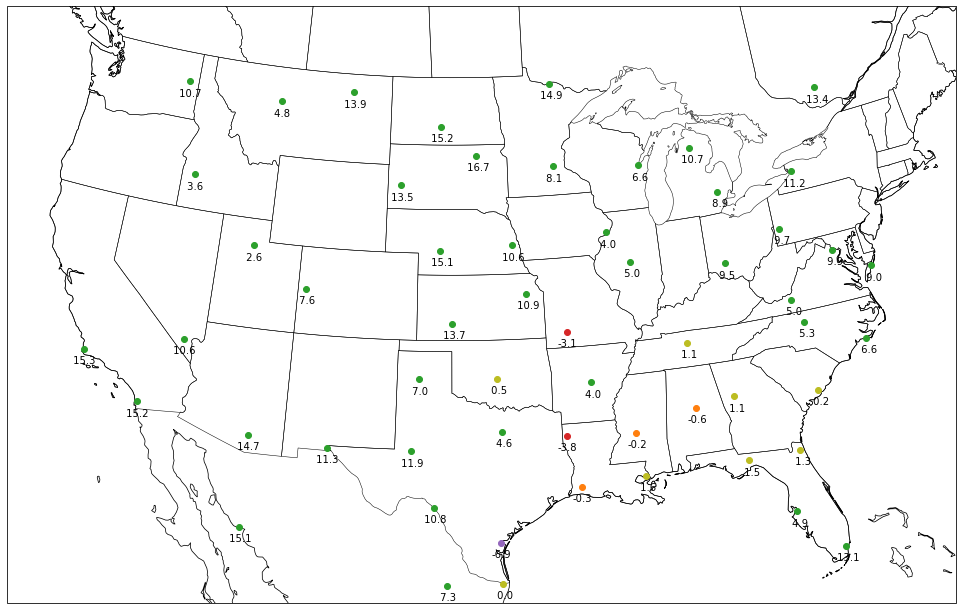

In [14]:
fig = plt.figure(figsize = (17, 12))
ax = fig.add_subplot(1, 1, 1, projection = crs)
ax.set_extent(*bounds, crs = ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)

for stn, sho in index.items():
    stn_loc = df_locations[df_locations['station'] == stn[-3:]].values
    if len(stn_loc) > 0:
        _, lat, lon = stn_loc[0]
    else:
        continue
        
        
    if not np.isnan(sho) and inbounds(lat, lon, *bounds[0]):
        ax.scatter(lon, lat, c = get_color(sho), transform = ccrs.PlateCarree())
        ax.text(lon, lat-.3, f'{sho: .1f}', transform = ccrs.PlateCarree(), ha = 'center', va = 'top')